In [2]:
import sys
from pathlib import Path

# Додати кореневу папку проекту до sys.path
project_root = Path().resolve().parent
sys.path.insert(0, str(project_root))

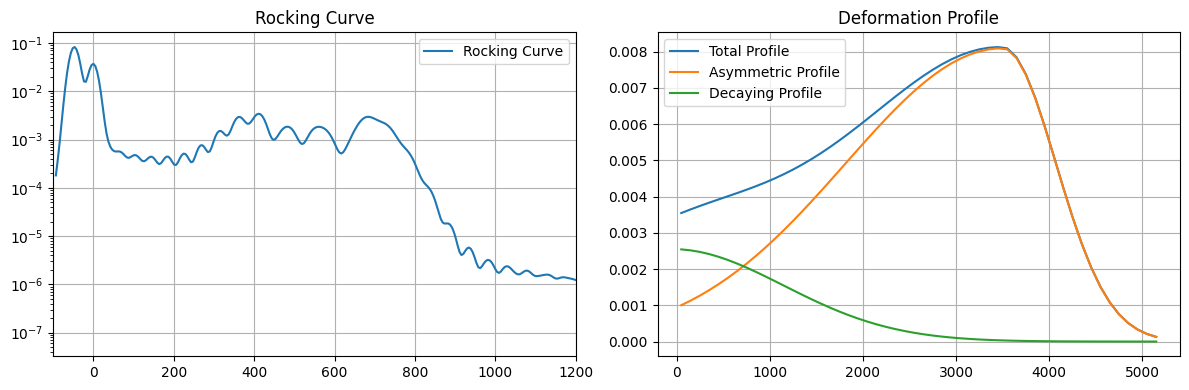

In [3]:
import matplotlib.pyplot as plt
import xrd
from importlib import reload
reload(xrd)

# params = [0.008094, 0.000943, 5200*1e-8, 3500*1e-8, 0.00255, 3000*1e-8, -50*1e-8]
params = [0.008094, 0.000943, 5200e-8, 3500e-8, 0.00255, 3000e-8, -50e-8]

params_obj = xrd.DeformationProfile(
    Dmax1=params[0],
    D01=params[1],
    L1=params[2],
    Rp1=params[3],
    D02=params[4],
    L2=params[5],
    Rp2=params[6],
    Dmin=0.0001,
    dl=100e-8
)
        
curve, profile = xrd.compute_curve_and_profile(params_obj=params_obj)

fig, axes = plt.subplots(1, 2, figsize=(12, 4)) # 12 width, 4 height

axes[0].set_title("Rocking Curve")
axes[0].semilogy(curve.X_DeltaTeta, curve.Y_R_vseZ, label="Rocking Curve")
# axes[0].set_ylim(0, 0.006)
axes[0].set_xlim(-100, 1200)
axes[0].grid(True)
axes[0].legend()

axes[1].set_title("Deformation Profile")
axes[1].plot(profile.X, profile.total_Y, label="Total Profile")
axes[1].plot(profile.X, profile.asymmetric_Y, label="Asymmetric Profile")
axes[1].plot(profile.X, profile.decaying_Y, label="Decaying Profile")
axes[1].grid(True)
axes[1].legend()

plt.tight_layout()
plt.show()